In [1]:
import pandas as pd
import geopandas as gpd

##### Read SA1 area names of Australia

In [11]:
df = pd.read_csv('../csv_files/SA1_2016_AUST.csv')
df = df.rename(columns=lambda x: x.strip())

##### Read geo map of Greater Capital cities Australia

In [12]:
geodf = gpd.read_file("../shape_files/GCCSA_2016_AUST.shp")
geodf = geodf.rename(columns=lambda x: x.strip())
geodf = geodf.dropna()
geodf.crs = {'init' :'epsg:4326'}
geodf.head()

,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry
0,1RNSW,Rest of NSW,1,New South Wales,788442.5890,"(POLYGON ((149.916344015 -37.07400600199998, 1..."
1,1GSYD,Greater Sydney,1,New South Wales,12368.1933,(POLYGON ((151.2704940150001 -33.8479190039999...
2,2RVIC,Rest of Vic.,2,Victoria,217503.1186,"(POLYGON ((145.35086003 -38.56585697299994, 14..."
3,2GMEL,Greater Melbourne,2,Victoria,9992.5118,(POLYGON ((144.7314098430001 -38.3502500179999...
4,3GBRI,Greater Brisbane,3,Queensland,15841.9603,"(POLYGON ((153.145413532 -27.07658807599995, 1..."


##### Read geo map of voting areas

In [13]:
geodf_2 = gpd.read_file("../shape_files/COM_ELB_region.shp")
geodf_2 = geodf_2.rename(columns=lambda x: x.strip())
geodf_2.crs = {'init' :'epsg:4326'}
geodf_2.head()

,Elect_div,State,Numccds,Actual,Projected,Total_Popu,Australian,Area_SqKm,Sortname,geometry
0,Bean,ACT,351,0,0,0,0,1.913970e+03,Bean,"(POLYGON Z ((149.206345 -35.345905 0, 149.2062..."
1,Canberra,ACT,311,0,0,0,0,3.122631e+02,Canberra,"POLYGON Z ((149.098612 -35.343853 0, 149.09838..."
2,Fenner,ACT,274,0,0,0,0,2.382121e+02,Fenner,"(POLYGON Z ((149.200716 -35.204954 0, 149.2007..."
3,Lingiari,NT,327,0,0,0,0,1.348158e+06,Lingiari,"(POLYGON Z ((138.001198 -17.396508 0, 138.0011..."
4,Solomon,NT,223,0,0,0,0,1.906100e+02,Solomon,"POLYGON Z ((131.000678 -12.489332 0, 131.00065..."


##### Read 2016 federal election result Australia (Aurin Data)

In [15]:
df_vote = pd.read_csv('../csv_files/vote_2016.csv')
df_vote = df_vote.rename(columns=lambda x: x.strip())
df_vote.head()

,alp_swing,grn_swing,fut_percent,aup_votes,nafd_percent,arf_votes,rep_votes,pup_votes,pir_percent,dhjp_percent,...,rep_swing,smk_votes,aeq_votes,sol_percent,cya_votes,grn_percent,np_votes,lp_votes,aapp_votes,coa_swing
0,-8.36,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.40,NaN,202.0,NaN,-3.56
1,-5.97,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.89,NaN,1203.0,NaN,-6.56
2,-4.81,5.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.01,NaN,551.0,NaN,-8.30
3,-9.15,3.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.62,NaN,702.0,NaN,-4.28
4,-3.57,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.50,NaN,247.0,NaN,-6.89


##### Matching the place name of Aurin election result data and election map

In [16]:
import numpy as np
a_1 = [x.lower() for x in df_vote['divisionnm'].values]
a = set(a_1)
b_1 = [x.lower().replace("'","") for x in geodf_2['Elect_div'].values]
b = set(b_1)
len(a.intersection(b))

143

##### Join two geodataframe and query a dataframe

In [28]:
joined_map = gpd.sjoin(geodf_2, geodf, op='intersects')
joined_map.shape

(238, 16)

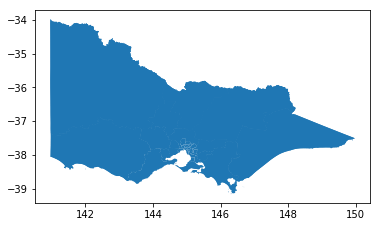

In [29]:
ax = joined_map.query("State == 'VIC'").plot()

##### Geo dataframe plotting

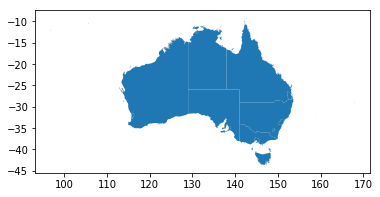

In [24]:
geodf.plot()

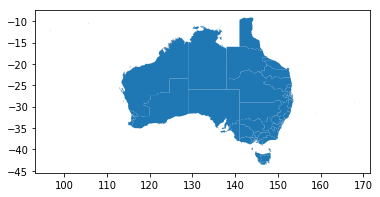

In [25]:
geodf_2.plot()

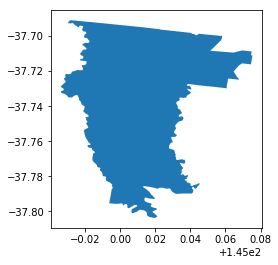

In [30]:
ax = geodf_2.query("Elect_div == 'Cooper'").plot()

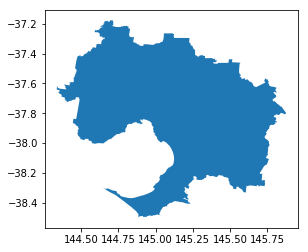

In [32]:
ax = geodf.query("GCC_NAME16 == 'Greater Melbourne'").plot()